In [1]:
import sys
import os
import operator
from typing import TypedDict, List, Annotated
from langgraph.graph import StateGraph, START, END

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import nest_asyncio
nest_asyncio.apply()


from src.llm_client import LLMClient
from src.youtube_helper import YouTubeHelper, YouTubeClient
from src.utils import load_prompt, combine_transcripts
from src.yt_agent import *
from src.text_to_speech import text_to_voice 


C:\Users\perko\Projects\youtube-stock-screener\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


All done!


In [ ]:
import os 
os.getcwd()

In [ ]:

workflow = StateGraph[AgentState, None, AgentState, AgentState](AgentState)

# Add our nodes
workflow.add_node("fetch_videos", get_videos_node)
workflow.add_node("fetch_transcripts", transcript_node)
workflow.add_node("summarize", summarize_node)
workflow.add_node("voiceover", voiceover_node)

# Define the flow
workflow.add_edge(START, "fetch_videos")
workflow.add_edge("fetch_videos", "fetch_transcripts")
workflow.add_edge("fetch_transcripts", "summarize")
workflow.add_edge("summarize", "voiceover")
workflow.add_edge("voiceover", END)

# Compile
app = workflow.compile()

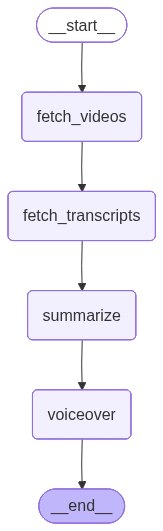

In [2]:
from IPython.display import Image, display

# Replace 'app' with whatever you named your compiled workflow
try:
    # draw_mermaid_png() works by sending the graph to a web API 
    # and returning the image data. No local installs needed!
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # Fallback if the image generation fails
    print("Graph visualization failed. Falling back to ASCII:")
    print(app.get_graph().draw_ascii())

In [3]:
channels = {
    "BWB - Business With Brian": "UULFyqlbzLoYtpqDXwRI9Yh5LA",
    "Chris Sain": "UULFrTFPf6rq5OUSWb7ILW9trg",
    "Asymmetric Investing by Travis Hoium": "UULFM2udYo4m-_uQfbfLGwf6mA",
    "Felix & Friends (Goat Academy)": "UULFJtfma0mE_XrBAD9uakcjfA",
    "Amit Kukreja": "UULFjZnbgPb08NFg7MHyPQRZ3Q",
}

initial_input = {
    "channels": channels,
    "start_date": "2026-02-01",
    "end_date": "2026-02-02",
    "video_ids": [],
    "transcripts": [],
    "summary": "",
    "audio_path": "",
    "errors": []
}

# Run the agent
# final_result = await app.ainvoke(initial_input)

In [4]:
async for state in app.astream(initial_input, stream_mode="values"):
    print(f"Current summary length: {len(state.get('summary', '')), len(state.get('transcripts', ''))}")

Current summary length: (0, 0)
Scanning BWB - Business With Brian via Playlist...
Scanning Chris Sain via Playlist...
Scanning Asymmetric Investing by Travis Hoium via Playlist...
Scanning Felix & Friends (Goat Academy) via Playlist...
  ✅ Found: They Crashed Silver on Purpose… Here’s The Real Plan
Scanning Amit Kukreja via Playlist...
Current summary length: (0, 0)

Found 1 videos. Fetching transcripts...
✅ Success: They Crashed Silver on Purpose… Here’s The Real Plan
Sleeping for 10.32s to avoid IP block...
Current summary length: (0, 1)


Task was destroyed but it is pending!
task: <Task pending name='Task-4' coro=<_async_in_context.<locals>.run_in_context() done, defined at C:\Users\perko\Projects\youtube-stock-screener\.venv\Lib\site-packages\ipykernel\utils.py:57> wait_for=<Task pending name='Task-5' coro=<Kernel.shell_main() running at C:\Users\perko\Projects\youtube-stock-screener\.venv\Lib\site-packages\ipykernel\kernelbase.py:590> cb=[Task.__wakeup()]> cb=[ZMQStream._run_callback.<locals>._log_error() at C:\Users\perko\Projects\youtube-stock-screener\.venv\Lib\site-packages\zmq\eventloop\zmqstream.py:563]>
C:\Users\perko\Projects\youtube-stock-screener\.venv\Lib\site-packages\google\genai\caches.py:1217: RuntimeWarning: coroutine 'Kernel.shell_main' was never awaited
  class AsyncCaches(_api_module.BaseModule):
Task was destroyed but it is pending!
task: <Task pending name='Task-5' coro=<Kernel.shell_main() running at C:\Users\perko\Projects\youtube-stock-screener\.venv\Lib\site-packages\ipykernel\kernelbase.py:5






SOURCE CHANNEL: Felix & Friends (Goat Academy)
VIDEO TITLE: They Crashed Silver on Purpose… Here’s The Real Plan
TRANSCRIPT CONTENT: JP Morgan just closed their short
position in silver at the exact market
bottom on Friday and they're pinning it
on the Fed chair. And I wasn't going to
make this video. I'm literally skiing in
Japan as we speak. And I was sitting in
the ski lift and I thought, what just
happened in the silver market? It pisses
me off. And mainstream media is telling
you the wrong story. And I believe you
deserve the full story. So here it is.
JP Morgan and I asked my editor to put
the screenshot so on the on the chart so
you the screen for you can see it
literally sold on the exact bottom
moment on Friday. That's item number
one. We also had the wonderful
coincidence of the London Metal Exchange
going offline on Friday, probably the
second most important place in the world
where silver sold. And then HSBC, the
second largest short holder on the LBMO,
well guess what

FileNotFoundError: [Errno 2] No such file or directory: 'reports/audio.mp3'